The links to download our training data: 
https://drive.google.com/file/d/1zLIgTuOskA_MIkBZKcChFyQeJtb1ELIG/view?usp=sharing
https://drive.google.com/file/d/1rR6cz0zUquKqsN0pd21lEYF--yfsSqpH/view?usp=sharing



In [1]:
job_title= 'Business Analyst' #you can change this to any job position you are searching for
                              # or input any skills you possess  to find the perfect job for you
location = 'United States'    # You can change this to any location you are searching in 
pageNum = 40                  #how many pages you want to scrape 

## Importing Libraries and Defining functions for later use

In [2]:
# Lets import some libraries 
from bs4 import BeautifulSoup
import re
import time
import requests
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import sklearn
import seaborn
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


from nltk.corpus import stopwords

import nltk


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [63]:
# Some defined functions that will help us later on 
def check_exists_by_xpath(xpath):
    try:
        browser.find_element_by_xpath(xpath)
    except NoSuchElementException:
        return False
    return True


def pageLink(job_title, location):
    test = 'https://www.indeed.com/jobs?q={}&l={}'
    url = test.format(job_title,location)
    return url

def plotter(title):
    import matplotlib.pyplot as plt
    import seaborn as sns

    df = features_df.sort_values(f'{title}',ascending=False)

    fig,ax = plt.subplots(1,1,figsize=(8,10))
    sns.barplot(data=df,y= 'features',x = f'{title}')
    ax.set_xlabel("Coefficients",fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    ax.set_title(f'{title} skillset', size=30)
    ax.set_ylabel("Features",fontsize=20)

In [68]:
#Defining the path and webdriver for selenium to use
data = pd.DataFrame(columns = ['Position', 'Location', 'Company', 'Rating', 'JobType', 'JobDescription'])
pageLink = pageLink(job_title, location)
path = "/Users/katia/Desktop/chromedriver"
browser = webdriver.Chrome(path)
browser.get(pageLink)
page_source = browser.page_source
soup = BeautifulSoup(page_source, 'lxml')
time.sleep(2)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=96.0.4664.110)


## Scrapping all links for job descriptions within the HTML code

In [5]:
linksNew =[] # an empty list that the scrapper will append all of the job posting links to 

for i in range(1,pageNum + 1 ):
    page_source = browser.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    time.sleep(1)
    j = soup.find_all('div', 'more_links')
    k = str(j)
    ids = k.split("jk=")
    for i in range(1,len(ids)):
        
        linksNew.append(browser.find_element_by_xpath('//*[@id="job_' +ids[i][0:16]+'"]').get_attribute(name="href"))
        # sometimes a pop up button will show up, if it happens the following 
        #lines of code will close that pop up and continue scrapping 
        try:
            popoverbutton = browser.find_element_by_xpath('//*[@id="popover-x"]/button')
            popoverbutton.click()
        
        except:
            continue
            
    ## Checking if next page button exists, if it does, click it
    
    if (check_exists_by_xpath('//a[@aria-label="Next"]//span[@class="np"]')):
        nextt = browser.find_element_by_xpath('//a[@aria-label="Next"]//span[@class="np"]'.format(i+1))
        nextt.click()
        time.sleep(1)

print(len(linksNew))


# exporting the scraped links to a csv file to make text analyzing easier and quicker 
linkdata = pd.DataFrame(linksNew)
linkdata.to_csv('DEC 12-WA JOBS.csv')

40
522


In [6]:
# We ran into an issue of getting a human verification if we looped through 1000+ links
# we broke up the list into sets of 100 links 

lst1 = linksNew[0:101]
lst2 = linksNew[101:201]
lst3 = linksNew[201:301]
lst4 = linksNew[301:401]
lst5 = linksNew[401:501]

lst6 = linksNew[501:601]
lst7 = linksNew[601:701]


lst8 = linksNew[701:801]
lst9 = linksNew[801:901]
lst10 = linksNew[901:1001]
lst11 = linksNew[1001:1101]
lst12 = linksNew[1101:1152]

lists = [ lst1, lst2, lst3, lst4, lst5, lst6, lst7, lst8, lst9, lst10, lst11, lst12]

## Looping through each link and scrapping all information needed

In [9]:
browser = webdriver.Chrome(path)
## the following lines of code will now iterate through every single link and pull out 
## everything we want to know about each job listing into a data frame 
vk = 0
for lst in lists:
    for job in lst:
        browser.get(job)
        page_source = browser.page_source
        soup = BeautifulSoup(page_source, 'lxml')
        jobsNew = soup.find_all('div', class_='jobsearch-ViewJobLayout-jobDisplay icl-Grid-col icl-u-xs-span12 icl-u-lg-span7')
    
    
    
        for i in jobsNew:
        
            try:
                titleNew = i.find('div', class_ = 'jobsearch-JobInfoHeader-title-container').text
            
                #print(titleNew)
            
            except:
                titleNew ="NA" 

            #data= data.append({'Position': titleNew},ignore_index=True) 
        
        
            try:
                a = i.find('div', class_ = 'icl-u-xs-mt--xs icl-u-textColor--secondary jobsearch-JobInfoHeader-subtitle jobsearch-DesktopStickyContainer-subtitle').text
                locationNew = a.split(",")[-1]
                #print(locationNew)
        
            except:
                locationNew = "NA"
              
        
            try:
                companyNew = i.find('div', class_ = 'icl-u-lg-mr--sm icl-u-xs-mr--xs').text
            
            
            except: 
                companyNew = "NA"
        
        
        
            try:
                ratingNew = i.find('div', class_ ='icl-Ratings icl-Ratings--sm icl-Ratings--gold').meta['content']
        
            except:
                ratingNew ="NA"
        
            #print(ratingNew)
        
        
            try:
                test = i.find('div',{"class": "jobsearch-JobDescriptionSection-sectionItem"}).findChildren()
                for k in test:
                    typeNew = k.text
                #print(typeNew)
        
            except:
                typeNew = 'NA'
        
        
            try:
                descNew= i.find('div', class_ ='jobsearch-jobDescriptionText').text
                #print(descNew)
            
            except:
                descNew = "NA"
            
      
        data= data.append({'Position': titleNew, 'Location': locationNew, 'Company': companyNew, 'Rating':ratingNew , 'JobType':typeNew, 'JobDescription': descNew}, ignore_index=True)         
            
        time.sleep(1)
    
        vk += 1
    
        if vk == 51:
        
            time.sleep(121)
            vk = 0
        
            
            

In [10]:
data

,Position,Location,Company,Rating,JobType,JobDescription
0,Business Analyst (Entry Level)-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,Contract,Role: Business Analyst (Entry Level)\nLocation...
1,Business/Data Analyst (Entry Level)-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,$30 an hour,Role: Business/Data Analyst (Entry Level)\nLoc...
2,Entry Level Business Analyst-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,$35 an hour,Role: Entry Level Business Analyst\nLocation: ...
3,Associate Business Analyst,TX 77056,NextEra Energy,3.9,Full-time,Requisition ID: 58269\nGexa Energy/NextEra Ene...
4,Jr Business Analyst,VA,TRESUME,NA,$27 - $30 an hour,Job Description: Analyzing structure of a busi...
...,...,...,...,...,...,...
623,Public Health Operations and Research Analyst,GA 30329,CyberData Technologies,3.3,Full-time,Title: Public Health Operations and Research ...
624,Business Systems Analyst - Telecommute,MN 55346Remote,UnitedHealth Group,3.6,Full-time,Combine two of the fastest-growing fields on t...
625,Operations Analyst,VA 20169,Novant Health,3.7,Full-time,Overview:\n\nNovant Health is seeking an Opera...
626,Business Operations Analyst,CA,Turo,3.9,Full-time,Job description\n\nThis is a rare opportunity ...


In [11]:
## Lets save the new data frame to another csv file! 
data = pd.DataFrame(data)
data.to_csv('Job_DATA without_Index.csv')
data1 = data
duplicatedata = data
dd = duplicatedata

## Cleaning our data 

In [69]:
#Lets read the CSV file from earlier
dataPP = pd.read_csv("DEC 12-WA JOBS.csv")
last_data = pd.read_csv("Job_DATA without_Index.csv")

In [70]:
#Combining the two CSV files into one dataframe
frames = [dataPP,last_data]
data1 = pd.concat(frames)
data1.reset_index(drop=True, inplace=True)

In [38]:
data1[0:15]

,Position,Location,Company,Rating,JobType,JobDescription
0,Data Analyst,OK,CDC Foundation ( Contract),NaN,"$66,000 - $72,000 a year",The CDC Foundation helps the Centers for Disea...
1,Data Analyst,OK,CDC Foundation ( Contract),NaN,"$66,000 - $72,000 a year",The CDC Foundation helps the Centers for Disea...
2,Business/Data Analyst (Entry Level)-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,$30 an hour,Role: Business/Data Analyst (Entry Level)\nLoc...
3,Junior Data Analyst,Shaker8 reviewsRemoteRemote,Shaker,3.9,NaN,"Remote | HQ in Oak Park, IL\n\nDue to growing ..."
4,Business Analyst (Entry Level)-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,Contract,Role: Business Analyst (Entry Level)\nLocation...
5,DATA ANALYST I,RI 02908,State of Rhode Island,4.0,"$74,400 - $84,340 a year",Class Definition\nGENERAL STATEMENT OF DUTIES:...
6,Junior Data Analyst,Chainlink LabsRemoteRemote,Chainlink Labs,NaN,Full-time,All roles with Chainlink Labs are globally rem...
7,Data Analyst - Entry Level,HotSchedules40 reviewsRemoteRemote,HotSchedules,3.3,Full-time,We are looking to hire a Data Analyst to join ...
8,Entry Level Business Analyst-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,$35 an hour,Role: Entry Level Business Analyst\nLocation: ...
9,Excel and Data Analyst,LLCRemoteRemote,"ChannelBound, LLC",NaN,$25 - $45 an hour,Are you an Excel Expert? Are you detail orient...


In [71]:
#Dropping duplicate job postings is essential for our analysis 
cleandata = data1.drop_duplicates()
cleandata

,Position,Location,Company,Rating,JobType,JobDescription
0,Data Analyst,OK,CDC Foundation ( Contract),NaN,"$66,000 - $72,000 a year",The CDC Foundation helps the Centers for Disea...
2,Business/Data Analyst (Entry Level)-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,$30 an hour,Role: Business/Data Analyst (Entry Level)\nLoc...
3,Junior Data Analyst,Shaker8 reviewsRemoteRemote,Shaker,3.9,NaN,"Remote | HQ in Oak Park, IL\n\nDue to growing ..."
4,Business Analyst (Entry Level)-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,Contract,Role: Business Analyst (Entry Level)\nLocation...
5,DATA ANALYST I,RI 02908,State of Rhode Island,4.0,"$74,400 - $84,340 a year",Class Definition\nGENERAL STATEMENT OF DUTIES:...
...,...,...,...,...,...,...
2743,"Data & System Analyst, Special Education",NY 10003,Uncommon Schools,3.2,Full-time,Company Description\nUncommon Schools is a non...
2744,Data Analyst/Programmer,NY 14586,Rochester Precision Optics,3.0,"$75,000 - $80,000 a year",SEE YOUR CAREER THROUGH A NEW LENS WITH RPO!RP...
2745,HRIS Data Analyst,NY 10019,Ipsos North America,3.7,Full-time,About Ipsos\n\nIpsos is the world’s third larg...
2746,Quality Data Analyst,NY 12866,Saratoga Hospital,4.0,Full-time,Summary of Position: Provides essential leader...


In [72]:
# our X value for the training data is the position title. Here we counted the number of appearances 
#of each job listing. 
XX = cleandata['Position'].value_counts()
XX[0:20]

Data Analyst                     232
Business Analyst                 128
Data Analyst I                    19
Junior Data Analyst               17
Entry Level Business Analyst      16
Junior Business Analyst           16
IT Business Analyst               14
Business Systems Analyst          13
Business Analyst I                10
Business Intelligence Analyst     10
Associate Business Analyst        10
Business Data Analyst              9
Jr. Business Analyst               8
Jr. Data Analyst                   8
DATA ANALYST                       8
Senior Data Analyst                8
Associate Data Analyst             8
Business Operations Analyst        6
Data Intelligence Analyst          6
Healthcare Data Analyst            5
Name: Position, dtype: int64

In [41]:
# Cleaning our data further，classify different and complex position name into more concise and general version. 

Position_col = data1['Position']


dt = pd.concat(frames)
dt.reset_index(drop=True, inplace=True)

data1.loc[data1['Position']=='Entry Level Business Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='Junior Business Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='IT Business Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='Business Systems Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='Business Analyst I'] = 'Business Analyst'
data1.loc[data1['Position']=='Associate Business Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='Jr. Business Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='Business Intelligence Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='Business Operations Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='IT Business Analyst I'] = 'Business Analyst'
data1.loc[data1['Position']=='BUSINESS ANALYST'] = 'Business Analyst'
data1.loc[data1['Position']=='Business Information Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='BUSINESS ANALYST (REMOTE)'] = 'Business Analyst'
data1.loc[data1['Position']=='Technology Business Analyst'] = 'Business Analyst'
data1.loc[data1['Position']=='Business Insights Analyst'] = 'Business Analyst'





data1.loc[data1['Position']=='Junior Data Analyst','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='Data Analyst I','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='Business Data Analyst','Position'] = 'Data Analyst '
data1.loc[data1['Position']=='Jr. Data Analyst','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='Associate Data Analyst','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='DATA ANALYST','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='Data Analyst (Remote)','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='Data/Business Analyst'] = 'Data Analyst'
data1.loc[data1['Position']=='Operations Data Analyst'] = 'Data Analyst'
data1.loc[data1['Position']=='Jr Data Analyst','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='Data Analyst, Entry Level','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='Data Analyst III','Position'] = 'Data Analyst'
data1.loc[data1['Position']=='BI Data Analyst','Position'] = 'Data Analyst'

Position_col = data1['Position']
filter1 = ( Position_col == 'Data Analyst')
filter2 = ( Position_col == 'Business Analyst')
filter3 = ( Position_col == 'Risk Analyst')
filter4 = ( Position_col == 'Healthcare Data Analyst')

new_data1 = data1[filter1]
new_data2 = data1[filter2]
new_data3 = data1[filter3]
new_data4 = data1[filter4]

frames = [new_data1,new_data2,new_data3,new_data4]
dt = pd.concat(frames)
dt.reset_index(drop=True, inplace=True)

dt.loc[data1['Position']=='Healthcare Data Analyst','Position'] = 'Healthcare Data Analyst'

dt.loc[data1['Position']=='Clinical Data Analyst','Position'] = 'Healthcare Data Analyst'




In [42]:
data1 = data1.drop_duplicates()
data1

,Position,Location,Company,Rating,JobType,JobDescription
0,Data Analyst,OK,CDC Foundation ( Contract),NaN,"$66,000 - $72,000 a year",The CDC Foundation helps the Centers for Disea...
2,Business/Data Analyst (Entry Level)-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,$30 an hour,Role: Business/Data Analyst (Entry Level)\nLoc...
3,Data Analyst,Shaker8 reviewsRemoteRemote,Shaker,3.9,NaN,"Remote | HQ in Oak Park, IL\n\nDue to growing ..."
4,Business Analyst (Entry Level)-Remote,Agama Solutions4 reviewsRemoteRemote,Agama Solutions,3.8,Contract,Role: Business Analyst (Entry Level)\nLocation...
5,DATA ANALYST I,RI 02908,State of Rhode Island,4.0,"$74,400 - $84,340 a year",Class Definition\nGENERAL STATEMENT OF DUTIES:...
...,...,...,...,...,...,...
2743,"Data & System Analyst, Special Education",NY 10003,Uncommon Schools,3.2,Full-time,Company Description\nUncommon Schools is a non...
2744,Data Analyst/Programmer,NY 14586,Rochester Precision Optics,3.0,"$75,000 - $80,000 a year",SEE YOUR CAREER THROUGH A NEW LENS WITH RPO!RP...
2745,HRIS Data Analyst,NY 10019,Ipsos North America,3.7,Full-time,About Ipsos\n\nIpsos is the world’s third larg...
2746,Quality Data Analyst,NY 12866,Saratoga Hospital,4.0,Full-time,Summary of Position: Provides essential leader...


In [43]:
XY = data1['Position'].value_counts()
XY

Data Analyst                            306
Business Analyst                        129
Data Analyst                              9
Senior Data Analyst                       8
Data Intelligence Analyst                 6
                                       ... 
Data Analyst - Modeler                    1
Data Analyst (SQL Required)               1
Member Experience Data Analyst            1
Data Analyst, Supply Chain Analytics      1
Business Data Analyst I                   1
Name: Position, Length: 706, dtype: int64

In [44]:
dt [0:15]
dl = dt
dl = dl.drop_duplicates()
dl

,Position,Location,Company,Rating,JobType,JobDescription
0,Data Analyst,OK,CDC Foundation ( Contract),NaN,"$66,000 - $72,000 a year",The CDC Foundation helps the Centers for Disea...
2,Data Analyst,Shaker8 reviewsRemoteRemote,Shaker,3.9,NaN,"Remote | HQ in Oak Park, IL\n\nDue to growing ..."
3,Data Analyst,Chainlink LabsRemoteRemote,Chainlink Labs,NaN,Full-time,All roles with Chainlink Labs are globally rem...
4,Data Analyst,RYAN Consulting Group (RCG)RemoteRemote,RYAN Consulting Group (RCG),NaN,$18 - $20 an hour,Our client has multiple contract roles for Jun...
5,Data Analyst,Wyvern Security LLC.RemoteRemote,Wyvern Security LLC.,NaN,$25 - $45 an hour,The successful candidate for this position wil...
...,...,...,...,...,...,...
1302,Healthcare Data Analyst,MA,Boston Children's Hospital,4.1,Full-time,61716BR\nCritical Care\nJob Posting Descriptio...
1303,Healthcare Data Analyst,HealthVerityRemoteRemote,HealthVerity,NaN,Full-time,"How you will help\nYou’ll provide relevant, ti..."
1304,Healthcare Data Analyst,Clarify Health Solutions.RemoteRemote,Clarify Health Solutions.,NaN,Full-time,Our Mission\nWe are on a mission to change hea...
1305,Healthcare Data Analyst,NY,Weill Cornell Medicine,4.0,NaN,Title: Healthcare Data Analyst\nLocation: Uppe...


## Analysis time! 

In [45]:
# Creating a training set with 80% of our data for the machine to learn on
# this will help our machine learn to then later make predictions on skill sets needed for 
# specific job titles 
y = dl['Position']
X = dl[['JobDescription']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=400)
print(X_train.shape,X_test.shape)


X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

print(X_train.head())

(356, 1) (90, 1)
                                      JobDescription
0  U.S. News & World Report is a multifaceted dig...
1  Commonstock makes finding quality investing in...
2  JOB DESCRIPTION\nYou’re an original. So are we...
3  About Next MusicSessions Live, part of the NEX...
4  WHO WE ARE\n\nBraze delivers customer experien...


In [73]:
# count vectorizer helps us break the job description into ngrams, bigrams, and trigrams 
# and counting the frequency of these words with the exception of some stop words 
cv = CountVectorizer(min_df=.1,max_df=.95,stop_words='english',ngram_range=(1,2))
cv_description_train = cv.fit_transform(X_train['JobDescription']).todense()
cv_description_train = pd.DataFrame(cv_description_train,columns=cv.get_feature_names())
cv_description_train

cv_description_test = cv.transform(X_test['JobDescription']).toarray()
cv_description_test = pd.DataFrame(cv_description_test,columns=['description_'+i for i in cv.get_feature_names()])

print(X_train.shape,X_test.shape)

y_lr_train = dl.loc[y_train.index,'Position']
y_lr_test = dl.loc[y_test.index,'Position']



(356, 1) (90, 1)


In [47]:
#calculating the logistic regression 

logr = LogisticRegression(max_iter=5000)
scores = cross_val_score(logr, cv_description_train, y_lr_train, cv=5, n_jobs=-1)
print(scores)
print(np.mean(scores),np.std(scores))

/Users/katia/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.90277778 0.88732394 0.91549296 0.91549296 0.85915493]
0.8960485133020345 0.021159917180068585


In [48]:
dl['Position'].value_counts()
dl['Position'].value_counts()[0]/len(dl['Position'])

0.6816143497757847

In [74]:
# calculating the accuracy of our logistic regression model
logr.fit(cv_description_train,y_lr_train)
print(logr.score(cv_description_train, y_lr_train))
print(logr.score(cv_description_test,y_lr_test))

0.9971910112359551
0.8777777777777778


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logr = LogisticRegression(max_iter=5000)
scores = cross_val_score(logr, cv_description_train, y_lr_train, cv=5, n_jobs=-1)
print(scores)
print(np.mean(scores),np.std(scores))

/Users/katia/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.90277778 0.88732394 0.91549296 0.91549296 0.85915493]
0.8960485133020345 0.021159917180068585


In [51]:
dl['Position'].value_counts()[0]/len(dl['Position'])

0.6816143497757847

In [52]:
logr.fit(cv_description_train,y_lr_train)
print(logr.score(cv_description_train, y_lr_train))
print(logr.score(cv_description_test,y_lr_test))

0.9971910112359551
0.8777777777777778


In [75]:
# visualizing our logistic regression feature frequency from select job positions
logr_coefs = pd.DataFrame(logr.coef_,columns=cv_description_train.columns,index=['Data Analyst','Business Analyst','Healthcare Data Analyst','Risk Analyst']).T
logr_coefs = logr_coefs.reset_index().rename(columns={'index':'features'})
logr_coefs.head()



,features,Data Analyst,Business Analyst,Healthcare Data Analyst,Risk Analyst
0,00,-0.040517,0.108017,-0.049035,-0.018466
1,000,-0.091009,0.156899,-0.042049,-0.023842
2,100,0.028959,-0.075437,-0.027613,0.074090
3,19,0.000319,0.014438,-0.012392,-0.002365
4,2021,-0.012123,0.050272,-0.030012,-0.008138


In [54]:
#Add absolute values of the coefficients
for i in logr_coefs.columns[1:]:
    logr_coefs['abs ' + i] = logr_coefs[i].apply(np.abs)
    
print(logr_coefs.head())
# Arrange the table in descending order of the absolute value of the coefficients
logr_coefs.filter(regex='(Business)|(features)').sort_values('abs Business Analyst', ascending=False).head(20)

  features  Data Analyst  Business Analyst  Healthcare Data Analyst  \
0       00     -0.040517          0.108017                -0.049035   
1      000     -0.091009          0.156899                -0.042049   
2      100      0.028959         -0.075437                -0.027613   
3       19      0.000319          0.014438                -0.012392   
4     2021     -0.012123          0.050272                -0.030012   

   Risk Analyst  abs Data Analyst  abs Business Analyst  \
0     -0.018466          0.040517              0.108017   
1     -0.023842          0.091009              0.156899   
2      0.074090          0.028959              0.075437   
3     -0.002365          0.000319              0.014438   
4     -0.008138          0.012123              0.050272   

   abs Healthcare Data Analyst  abs Risk Analyst  
0                     0.049035          0.018466  
1                     0.042049          0.023842  
2                     0.027613          0.074090  
3             

,features,Business Analyst,abs Business Analyst
62,business,-0.523574,0.523574
63,business analyst,-0.395604,0.395604
123,data,0.348981,0.348981
125,data analyst,0.315507,0.315507
478,sql,0.307109,0.307109
465,sets,0.266997,0.266997
134,database,0.266399,0.266399
503,team,-0.254569,0.254569
509,technology,0.243527,0.243527
453,role,-0.241706,0.241706


In [60]:
#cleaning out and extracting set stills and features
features_list = ['tableau','cloud','aws','python','databases','visualisation','machine learning','sql','azure','reports','insights','big data','spss','sas','google','hadoop',
                'spark','dashboard','stakeholders','business intelligence']
exact_feature = ['r','excel']
features_df = pd.DataFrame(columns=logr_coefs.columns)
for feature in features_list:
    foo = logr_coefs[logr_coefs['features'].str.contains(feature)]
    features_df = pd.concat([features_df,foo],axis=0)
for feature in exact_feature:
    foo = logr_coefs[logr_coefs['features']== feature]
    features_df = pd.concat([features_df,foo],axis=0)
features_df

,features,Data Analyst,Business Analyst,Healthcare Data Analyst,Risk Analyst,abs Data Analyst,abs Business Analyst,abs Healthcare Data Analyst,abs Risk Analyst
501,tableau,-0.149233,0.200816,-0.023995,-0.027589,0.149233,0.200816,0.023995,0.027589
415,python,-0.167568,0.167087,-0.048182,0.048663,0.167568,0.167087,0.048182,0.048663
135,databases,-0.027422,-0.044403,0.062914,0.008912,0.027422,0.044403,0.062914,0.008912
199,experience sql,-0.098555,0.114441,-0.011239,-0.004647,0.098555,0.114441,0.011239,0.004647
478,sql,-0.298041,0.307109,-0.020385,0.011317,0.298041,0.307109,0.020385,0.011317
441,reports,-0.045124,0.020071,0.061971,-0.036918,0.045124,0.020071,0.061971,0.036918
266,insights,-0.186251,0.169555,-0.012710,0.029406,0.186251,0.169555,0.012710,0.029406
122,dashboards,-0.161712,0.104495,-0.005684,0.062901,0.161712,0.104495,0.005684,0.062901
480,stakeholders,-0.007354,-0.005940,-0.033709,0.047004,0.007354,0.005940,0.033709,0.047004
64,business intelligence,-0.051560,0.072424,-0.012853,-0.008010,0.051560,0.072424,0.012853,0.008010


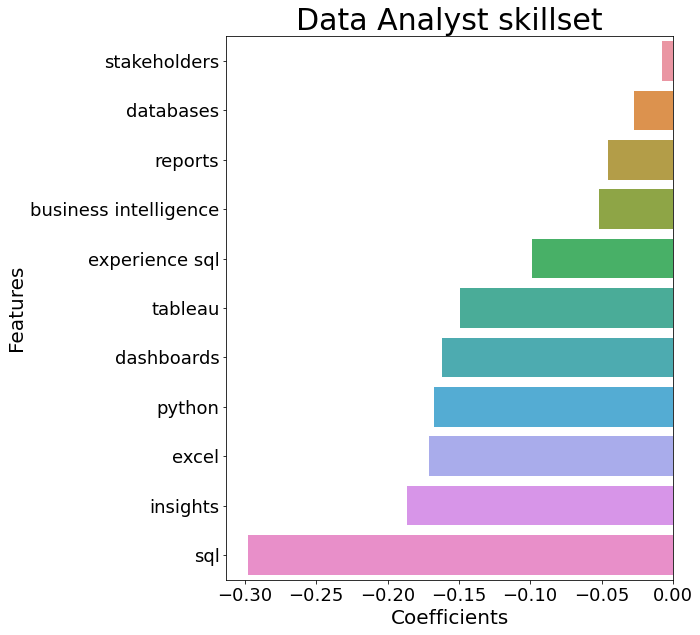

In [64]:
#Visualized the output as diagrams
plotter('Data Analyst')

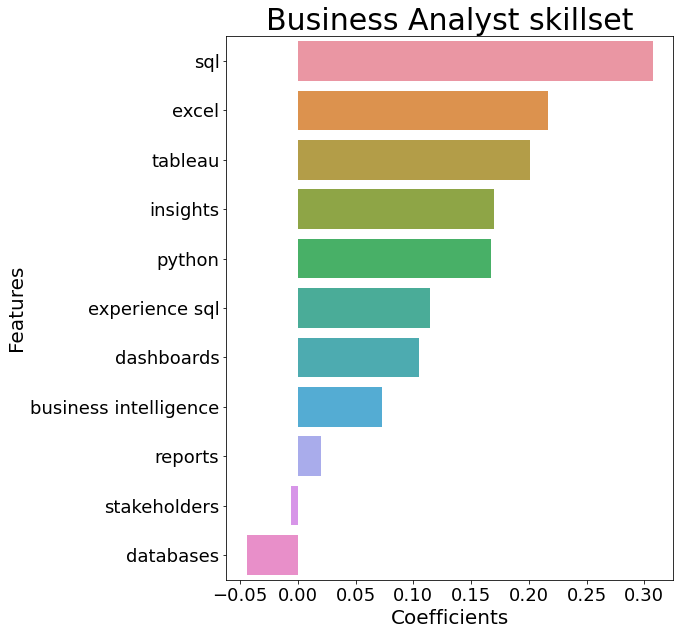

In [65]:
plotter('Business Analyst')

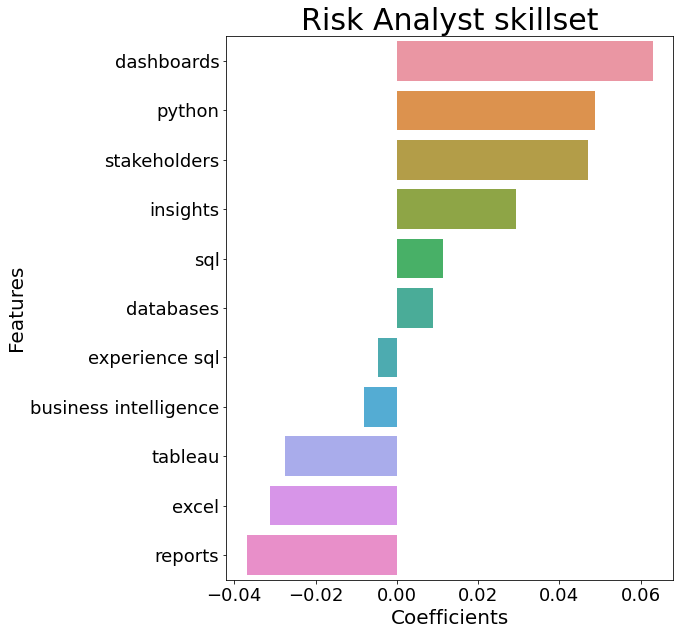

In [66]:
plotter('Risk Analyst')

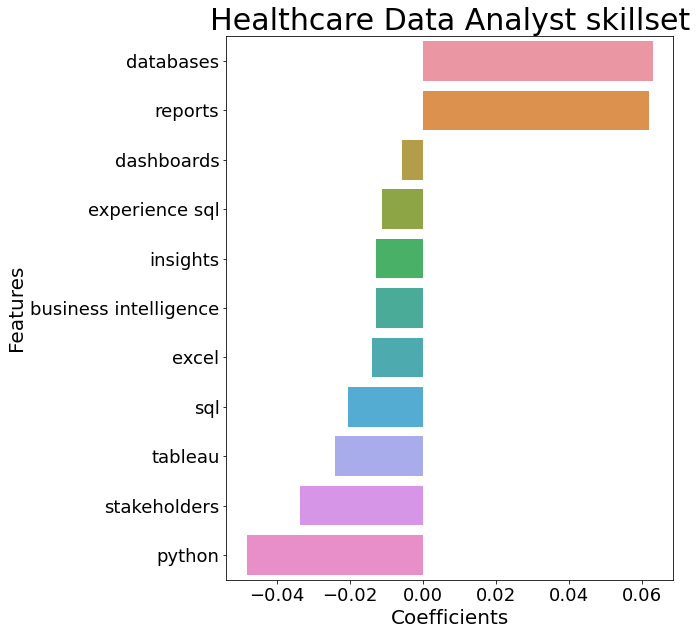

In [67]:
plotter('Healthcare Data Analyst')
